# Question 1 - Anaalysis 2

Problem: Find out distribution of mail-traffic over time. Please Run the last block directly. Proceesed data is stored in a csv.

In [2]:
import email
import os
import functools
import itertools
import matplotlib.pyplot as plt
import operator
import csv

Collecting path variables. Please change the value of rpath according to your machine.

In [3]:
rpath="C:/Users/Ankit Mahajan/Documents/Python Scripts/"
path="midterm/data/enron/maildir"
root = rpath+path

Defining a function that filters counts emails based on the month and yea that they were sent

In [4]:
def addtodictionary(raw_email):
    email_message = email.message_from_string(raw_email)
    m = str(email_message['Date']).split(' ')[2]
    y = str(email_message['Date']).split(' ')[3]
    k = m +" "+ y
    if k in datatoanalyse:
        datatoanalyse[k] +=1
    else:
        datatoanalyse[k] = 1

Iterating through different all the items for each each user

In [5]:
datatoanalyse = {}
for subdir, dirs, files in os.walk(root):
    for file in files:
        with open(subdir+"/"+file, 'r') as f:
            addtodictionary(f.read())

Sorting the values and preparing data for visualization

In [6]:
freq = sorted(datatoanalyse.items(), key=operator.itemgetter(1), reverse=True)[:25]
freq.reverse()
labels, values = zip(*freq)

Plotting results 

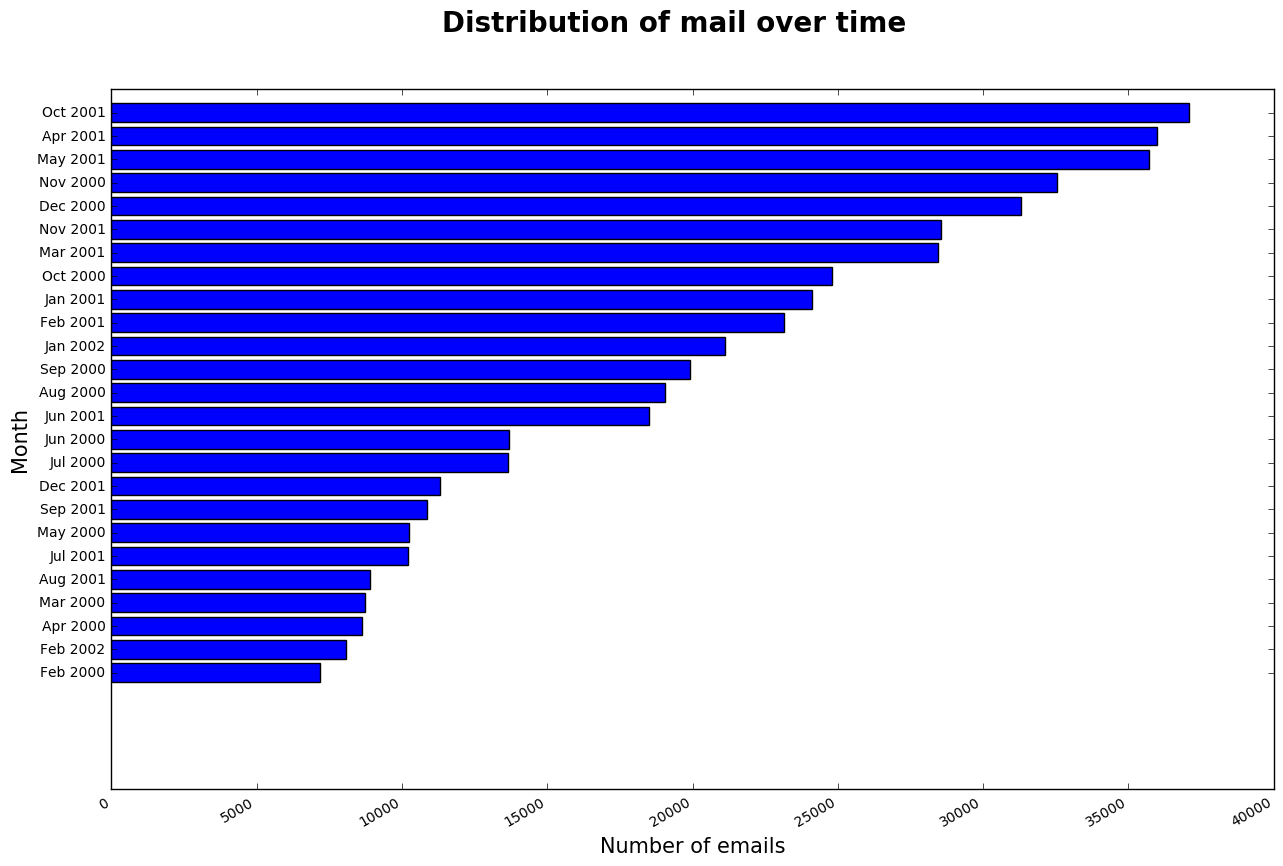

In [19]:
plt.barh(range(len(freq)), values, align='center')
plt.yticks(range(len(freq)),labels)
fig = plt.gcf()
fig.autofmt_xdate()
fig.set_size_inches(15, 10)
plt.suptitle('Distribution of mail over time' , fontsize=20, fontweight='bold')
plt.ylabel("Month", fontsize=15)
plt.xlabel("Number of emails", fontsize=15)
plt.show()

Displaying data to suppport the graphs

In [8]:
freq.reverse()

In [10]:
print("Top 25 months with highest email traffic are- \nMonth Year : Number of mails")
for r in freq:
    print(r[0], " : ",r[1])

Top 25 months with highest email traffic are- 
Month Year : Number of mails
Oct 2001  :  37100
Apr 2001  :  35995
May 2001  :  35692
Nov 2000  :  32525
Dec 2000  :  31294
Nov 2001  :  28541
Mar 2001  :  28441
Oct 2000  :  24795
Jan 2001  :  24123
Feb 2001  :  23139
Jan 2002  :  21111
Sep 2000  :  19929
Aug 2000  :  19044
Jun 2001  :  18487
Jun 2000  :  13693
Jul 2000  :  13651
Dec 2001  :  11318
Sep 2001  :  10863
May 2000  :  10247
Jul 2001  :  10223
Aug 2001  :  8897
Mar 2000  :  8715
Apr 2000  :  8626
Feb 2002  :  8066
Feb 2000  :  7197


Storing data to a csv fro future referrence

In [15]:
import csv
wfreq = sorted(datatoanalyse.items(), key=operator.itemgetter(1), reverse=True)
with open("Analysis 2"+'.csv','w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["Time","Frequency"])
    for r in wfreq:
        writer.writerow([r[0],r[1]])

Please this block directly

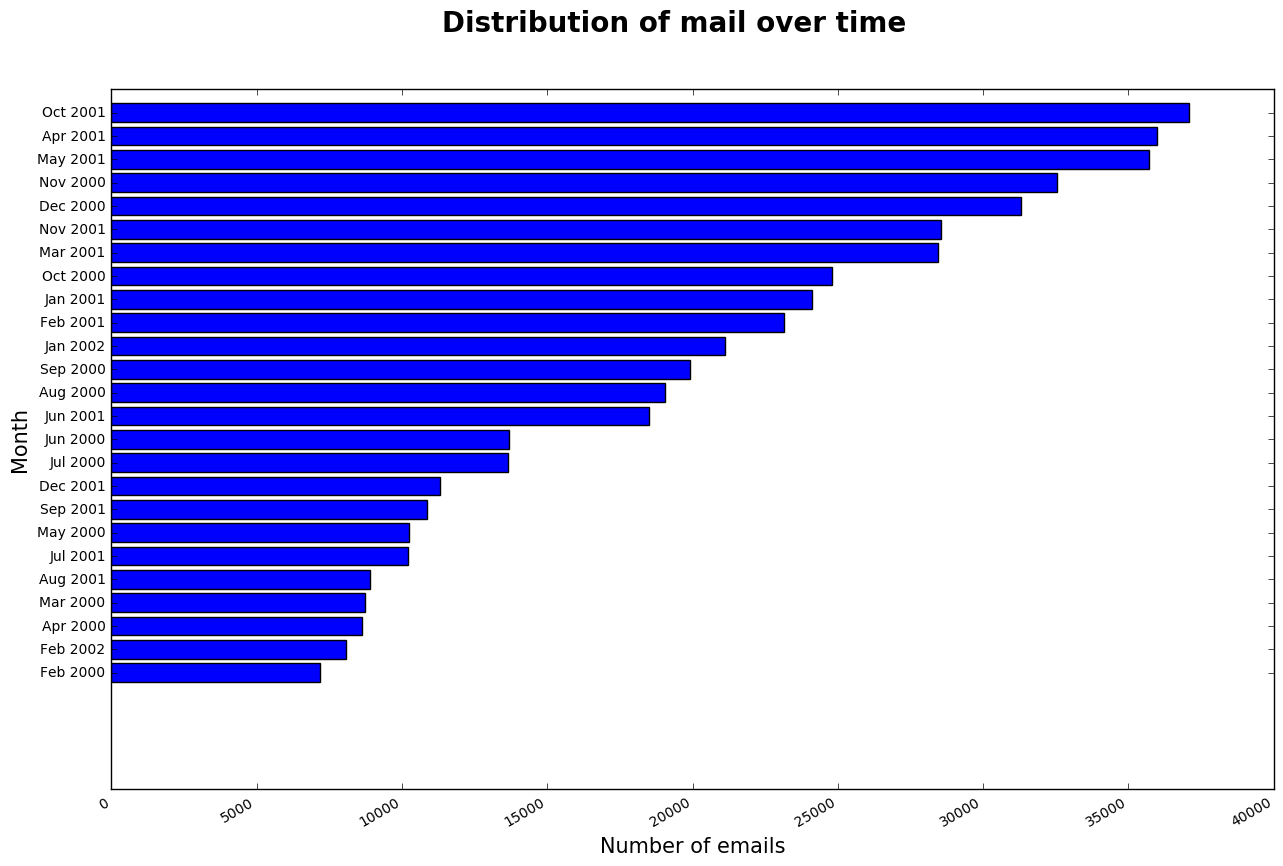

In [4]:
import csv

freq = {}
with open('Analysis 2.csv') as f:
    reader = csv.DictReader(f)
    i= 0
    for r in reader:
        if i == 25:break
        freq[r['Time']] = int(r['Frequency'])
        i+=1
freq = sorted(freq.items(), key=operator.itemgetter(1),)
labels, values = zip(*freq)
plt.barh(range(len(freq)), values, align='center')
plt.yticks(range(len(freq)), labels)
fig = plt.gcf()
fig.set_size_inches(15, 10)
fig.autofmt_xdate()
plt.suptitle('Distribution of mail over time' , fontsize=20, fontweight='bold')
plt.ylabel("Month", fontsize=15)
plt.xlabel("Number of emails", fontsize=15)
plt.show()